# Geothermal Development in the US Basin and Range

### Compiled October 2020 from open data sources

Draft in progress

In [103]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Installed MWe for each reservoir

Where the installed capacity of a reservoir as reported on a company website or presentation does not match the sum of the plant capacities complied from open data sources (see below), the company data is used. 

In [104]:
reserviors = pd.read_csv(r'development-byreservoir.csv')
reserviors

,Reservior,State,Installed_MWe,FirstGen
0,Amedee,California,1.600,1988
1,Beowawe,Nevada,19.900,1985
2,Blue Mountain,Nevada,49.500,2009
3,Bradys,Nevada,26.100,1992
4,Coso,California,302.000,1987
5,Cove Fort,Utah,25.000,2013
6,Desert Peak,Nevada,23.000,1985
7,Dixie Valley,Nevada,72.000,1988
8,Don Campbell,Nevada,42.000,2013
9,Florida Canyon,Nevada,0.075,2012


In [105]:
reserviors['Installed_MWe'].describe()

count     33.000000
mean      36.101364
std       58.441405
min        0.040000
25%        4.000000
50%       23.000000
75%       30.100000
max      302.000000
Name: Installed_MWe, dtype: float64

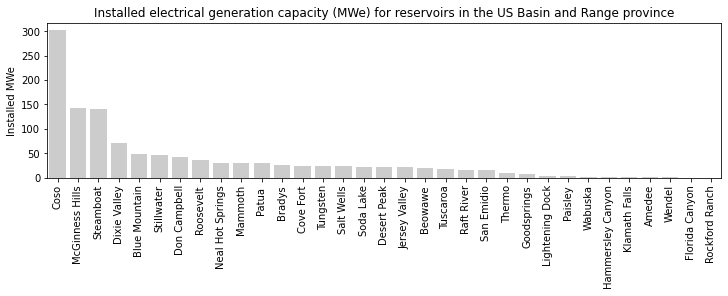

In [106]:
plt.figure(
    figsize=(10,4),
    constrained_layout=True,
)

sortedbymw = reserviors.sort_values(
    by = 'Installed_MWe',
    ascending=False
)

sns.barplot(
    x = 'Reservior',     
    y = 'Installed_MWe', 
    data = sortedbymw,
    color = '#cccccc'
) 

plt.title('Installed electrical generation capacity (MWe) for reservoirs in the US Basin and Range province')

plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Installed MWe')

plt.show()

# Geothermal power plants 



In [107]:
plants = pd.read_csv(r'development-byplant.csv')
plants

,Reservior,Name,Comissioned,Type,Capacity_Mwe,NetGen_Mwe,Status,Owner
0,Amedee,Amedee,1988,binary,1.60,NaN,NaN,NaN
1,Beowawe,Beowawe,1985,double flash,18.00,NaN,NaN,Beowawe Power LLC
2,Beowawe,Beowawe 2,2011,binary,1.90,NaN,NaN,Terra-Gen Power
3,Blue Mountain,Blue Mountain Faulkner,2009,binary,50.00,NaN,NaN,Altarock
4,Bradys,Brady Hot Springs,1992,double flash,26.10,NaN,NaN,Ormat
5,Coso,Coso Finance Partners Geothermal Plant,1987,flash,90.20,NaN,NaN,NaN
6,Coso,Coso Energy Developers Geothermal Plant,1988,flash,90.00,NaN,NaN,NaN
7,Coso,Coso Power Developers Geothermal Plant,1989,flash,90.00,NaN,NaN,NaN
8,Cove Fort,Cove Fort,2013,binary,25.00,NaN,NaN,ENEL Green Power (Oski Energy phase 2?)
9,Desert Peak,Desert Peak (decommissioned),1985,flash,9.90,NaN,decommissioned 1985,Unknown


In [108]:
plants['Capacity_Mwe'].describe()

count    55.000000
mean     20.392182
std      22.553259
min       0.040000
25%       4.000000
50%      13.000000
75%      26.000000
max      90.200000
Name: Capacity_Mwe, dtype: float64

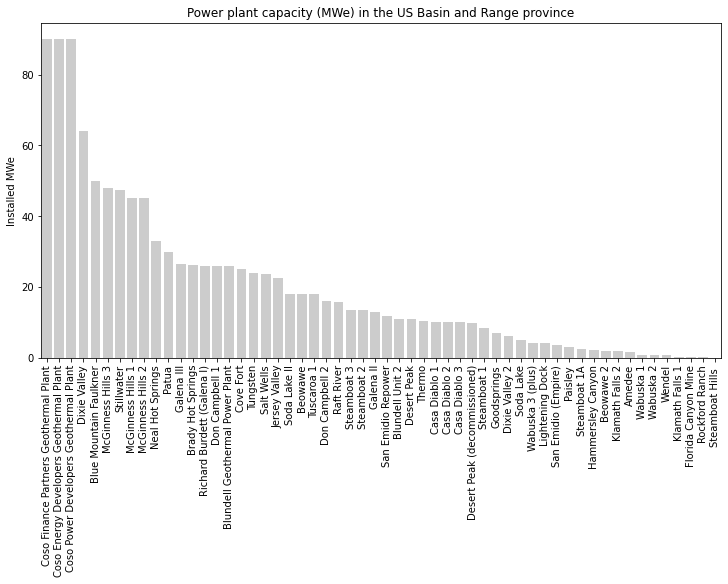

In [109]:
plt.figure(
    figsize=(10,8),
    constrained_layout=True,
)

sortedbymw = plants.sort_values(
    by = 'Capacity_Mwe',
    ascending=False
)

sns.barplot(
    x = 'Name',     
    y = 'Capacity_Mwe', 
    data = sortedbymw,
    color = '#cccccc'
) 

plt.title('Power plant capacity (MWe) in the US Basin and Range province')

plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Installed MWe')

plt.show()

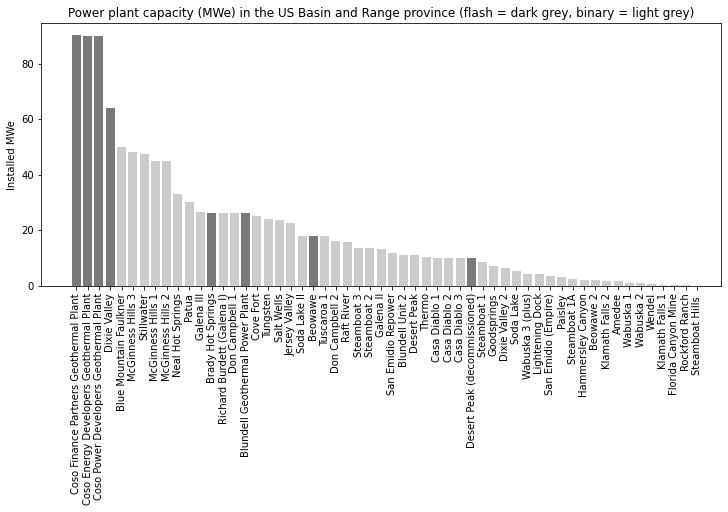

In [110]:
sortedbymw = plants.sort_values(
    by = 'Capacity_Mwe',
    ascending=False
)

x = sortedbymw.Name
y = sortedbymw.Capacity_Mwe

planttype = sortedbymw.Type
col = []
for val in planttype:
    if val == 'binary':
        col.append('#cccccc')
    elif val == 'flash':
        col.append('#7a7a7a')
    else:
        col.append('#7a7a7a')

plt.figure(
    figsize=(10,7),
    constrained_layout=True,
)

plt.bar(x,y, color = col)

plt.title('Power plant capacity (MWe) in the US Basin and Range province (flash = dark grey, binary = light grey)')

plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Installed MWe')

plt.show()

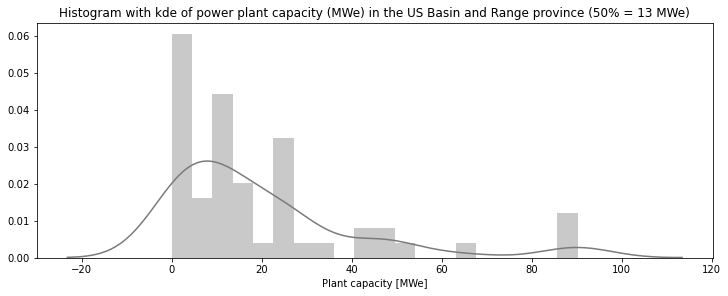

In [114]:
#sb.distplot(df['petal_length'],kde = False)

plt.figure(
    figsize=(10,4),
    constrained_layout=True,
)

sns.distplot(
    plants.Capacity_Mwe,
    bins = 20,
    color = '#7a7a7a',
) 

plt.title('Histogram with kde of power plant capacity (MWe) in the US Basin and Range province (50% = 13 MWe)')

plt.xlabel('Plant capacity [MWe]')

plt.show()

# Data Sources

TBC